# Deep Learning
## Exercise 2 - Machine Learning Basics

### 1. Linear Regression
Implement a linear regression (the `lin_reg` function) with __PyTorch__ to fit a line, $h(x) = w_0 + w_1 x$,  to a set of points generated using the `generate_data` function as defined below. In particular, find $w_0$ and $w_1$ such that the sum of squares error, $\sum_i ||h(x_i) - y_i||^2$, is minimized.

For this task, use tensor operations, `torch.*` and `torch.linalg.inv` to compute the solution via matrix inversion.

In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
def generate_data(f, spread, x_start, x_end, delta=1):
    """Generate a number of data points from f with some spread."""
    x = torch.arange(x_start, x_end, delta)
    y = f(x) + (torch.rand(*x.shape) - 0.5) * spread
    return x.unsqueeze(-1), y

# generate some points
w_gt = torch.tensor([2, 3], dtype=torch.float)
f = lambda x: w_gt[0] + w_gt[1] * x
x, y = generate_data(f, spread=5, x_start=0, x_end=10, delta=0.05)

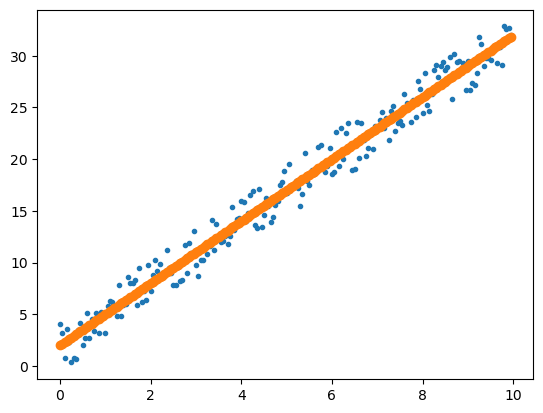

In [3]:
# plot the points
plt.plot(x, y, marker='.', linewidth=0)

# plot f (orange)
plt.plot(x, f(x), 'o', linewidth=5)

plt.show()

In [4]:
def lin_reg(X, y):
    """
    Return the exact linear regression line, i.e. the weights which minimize the loss.

    Input values:
        - tensor X = [[x_0], ..., [x_n]], shape=(n, 1): the x-values of the data points
        - tensor y = [y_0, ..., y_n], shape=(n,): the y-values of the data points

    Return:
        - tensor w = [w_0, w_1] such that w_0 is the bias and w_1 is the slope. Recall h(x) = w_0 + w_1 * x.
    """
    # ToDo: Remove dummy and implement this function
    X = torch.cat([torch.ones_like(X), X], axis=1)
    X_dagger = torch.linalg.inv((X.T @ X)) @ X.T
    w = X_dagger @ y
    return w

# perform linear regression
w = lin_reg(x, y)

In [5]:
print(f'computed w:\t{w.tolist()}')
print(f'actual w:\t{w_gt.tolist()}')

computed w:	[1.9668030738830566, 3.007582187652588]
actual w:	[2.0, 3.0]


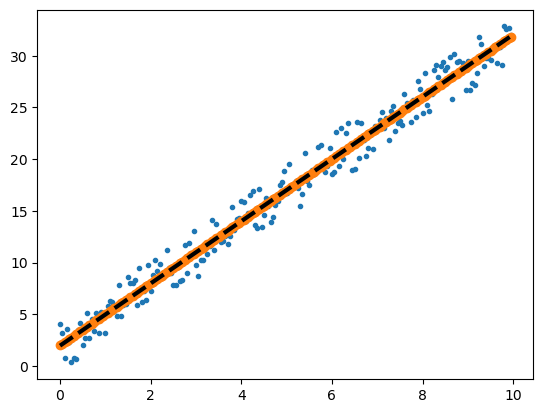

In [6]:
# plot the points
plt.plot(x, y, marker='.', linewidth=0)

# plot f (orange)
plt.plot(x, f(x), 'o', linewidth=5)

# plot the regression line (black dashed)
plt.plot(x, w[0] + w[1] * x, 'k--', linewidth=3)

plt.show()

### 2. Sqared Loss

Compute the **Empirical Loss (Training Error)** of your hypothesis.
\begin{equation}
\mathcal{L} = \frac{1}{n}\sum_{i=1}^{n} l(h, x_i, y_i)
\end{equation}
where $l(h, x_i, y_i) = (y_i - h(x_i))^2$, i.e. squared loss.

In [7]:
def squaredLoss(hX, y):
    """
    Return the squared loss, i.e. L2 Loss, of the linear regression.

    Input values:
        - tensor fX = [h(x_0), ..., h(x_n)], shape=(n, ): your hypothesis
        - tensor y = [y_0, ..., y_n], shape=(n,): the y-values of the data points

    Return:
        - float loss
    """
    # ToDo: Remove dummy and compute the square loss
    loss = 1./hX.shape[0] * ( hX - y ).pow(2).sum().item()
    return loss

# ToDo: Remove dummy and compute h(x) for the linear regression
hX = w[0] + w[1]*x.flatten()
loss = squaredLoss(hX, y)

In [8]:
print(f'squared loss = {loss:.4}')

squared loss = 1.857
